#### This is just an alternate example to know how the pca is working (done without using an svd)

In [36]:


import numpy as np
import random

#creating the data matrix
a = np.array([random.sample(range(0, 100), 100)]).reshape(25,4)

#normalizing our data (defined below)
a,m,s = featureNormalize(a)

# computing covariance matrix
sigma = np.cov(a.T)

print(sigma.shape)


#computing eigen values(el) and eigen vectors(ev)
el = (np.linalg.eig(sigma))[0]
ev = (np.linalg.eig(sigma))[1]

print(el)

print(ev.shape)

#Creating the new dataset
new = a.dot(ev)

# printing the covariance matrix of new data set(should be a diagonal matrix i.e, non diagonal element should be almost = 0)
print(np.cov(new.T))

(4, 4)
[1.68402008 1.10122918 0.79744736 0.58397004]
(4, 4)
[[ 1.68402008e+00  8.05959293e-16 -1.78268729e-16 -1.56926816e-16]
 [ 8.05959293e-16  1.10122918e+00 -4.42229392e-16  4.43707339e-17]
 [-1.78268729e-16 -4.42229392e-16  7.97447361e-01  1.71936162e-16]
 [-1.56926816e-16  4.43707339e-17  1.71936162e-16  5.83970044e-01]]


# 1.1 Example Dataset 1

In [37]:
#To help you understand how PCA works, you will ﬁrst start with a 2D dataset which has one direction of large variation and 
#one of smaller variation. In this part of the exercise, you will visualize what happens when you use PCA to reduce the data
#from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data 
#in this example allows us to visualize the algorithms better.

In [38]:

#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D




#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex7\ex7\ex7data1.mat')

mat_contents


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

(2, 8)

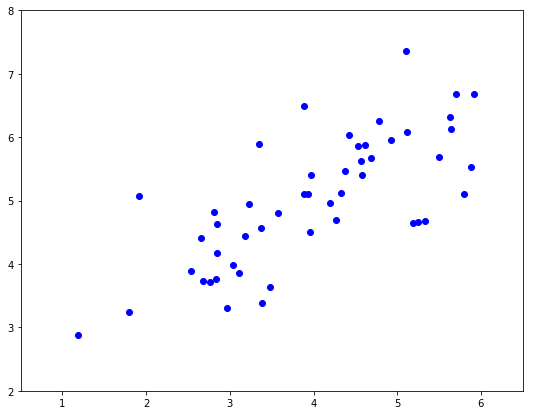

In [39]:
# We start this exercise by using a small 2D dataset that is easily to visualize

#Extracting input data
X = mat_contents['X']

#Plotting the graph
plt.figure(figsize=(9,7))

plt.plot(X[:,0],X[:,1],'bo')

plt.xlim(.5,6.5)
plt.ylim(2,8)

# 2.2 Implementing PCA

In [40]:
#returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. This is often
#a good preprocessing step to do when working with learning algorithms.

def featureNormalize(X):
    
    # mean of each feature
    mu = X.mean(axis = 0)
    
    # standard deviation of each feature
    sigma = X.std(axis = 0)
    
    # Feature Normalizing
    X_norm = (X - mu)/sigma
    
    # return the normalized training data, mean and standard deviation
    return X_norm,mu,sigma

In [41]:
# It is important to ﬁrst normalize the data by subtracting the mean value of each feature from the dataset, and scaling 
# each dimension so that they are in the same range

#Normalizing our X
X_norm,mu,sigma = featureNormalize(X)

In [42]:
# Now we will implement PCA

# computes eigenvectors of the covariance matrix of X_norm Returns the eigenvectors U, the eigenvalues (on diagonal) in S
def pca(X):
    
    # Storing the total training data(m) and the no. of features(n)
    m,n = X.shape
    
    # Computing the covariance matrix
    CovarianceMatrix = ((X.transpose()).dot(X))/m
    
    # Single value decomposition
    u,s,v = np.linalg.svd(CovarianceMatrix)
    
    # returning eigen vector(u) eigen values(s) and right singular vector(v)
    return u,s,v
    

In [43]:
# Running pca to get eigen vector(u) eigen values(s) and right singular vector(v)
U,S,V = pca(X_norm)

print(U.shape)
print(S)
print(V.shape)

print(np.cov((X_norm.dot(U)).T))


(2, 2)
[1.73553038 0.26446962]
(2, 2)
[[ 1.77094936e+00 -3.07451980e-16]
 [-3.07451980e-16  2.69866963e-01]]


In [44]:
S

array([1.73553038, 0.26446962])

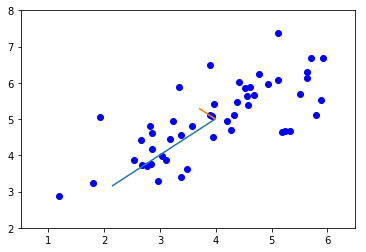

In [45]:
plt.xlim(.5,6.5)
plt.ylim(2,8)

#fig.set_size_inches(8,6)          # Make graph square


plt.plot(X[:,0],X[:,1],'bo')

for i in range(len(S)):
    x1 = mu[0],(mu[0] + 1.5 * S[i]* U[:,i])[0]
    y1 = mu[1] , (mu[1] + 1.5 * S[i] * U[:,i])[1]
     
    plt.plot(x1,y1)




# 2.3 Dimensionality Reduction with PCA

In [46]:
# After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting 
# each example onto a lower dimensional space, x(i) → z(i) (e.g., projecting the data from 2D to 1D). In this part of the 
# exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. In 
# practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use 
# the projected data instead of the original data. By using the projected data, you can train your model faster as there are 
# less dimensions in the input.


## 2.3.1 Projecting the data onto the principal components

In [47]:
# Speciﬁcally, you are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K.
# You should project each example in X onto the top K components in U. Note that the top K components in U are given by the 
# ﬁrst K columns of U, that is U reduce = U(:, 1:K). 
    

In [48]:
#computes the projection of the normalized inputs X into the reduced dimensional space spanned by the first K columns of U. 
#It returns the projected examples in Z.

def projectData(X_norm, U, K):
    
    # taking the first K eigen vectors which will be matrix multiplied to our X_norm
    U_reduce = U[:,0:K]
    
    # matrix multiplication of X_norm and first K eigen vectors
    return X_norm.dot(U_reduce)
    

In [49]:
# Project the data onto K = 1 dimension
K = 1

# Getting the reduced dimensionality data
Z = projectData(X_norm, U, K)
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

## 2.3.2 Reconstructing an approximation of the data

In [50]:
# After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them 
# back onto the original high dimensional space. Your task is to complete recoverData.m to project each example in Z back 
# onto the original space and return the recovered approximation in X_recovered.


#recovers an approximation the original data that has been reduced to K dimensions. It returns approximate reconstruction in
#X_recovered
def recoverData(Z, U, K):
    
    # taking the first K eigen vectors which will be matrix multiplied to our X_norm
    U_reduce = U[:,0:K]
    
    #recovering the original data
    Xapprox = Z.dot(U_reduce.T)
    
    
    return Xapprox


In [51]:
# recovering the original data
X_recovered  = recoverData(Z, U, K)

X_recovered[0]

array([-1.05805279, -1.05805279])

## 2.3.3 Visualizing the projections

(-4, 3)

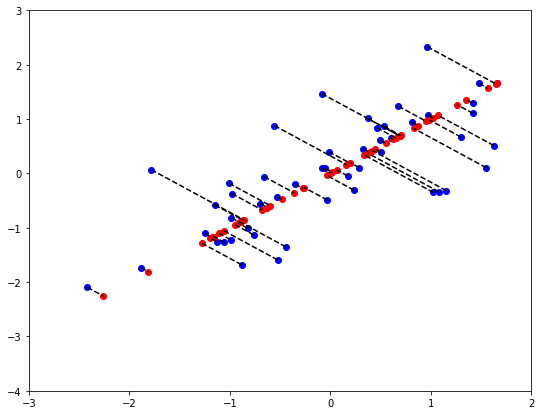

In [52]:
plt.figure(figsize=(9,7))

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');


#After completing both projectData and recoverData, now perform both the projection and approximate reconstruction to show 
#how the projection aﬀects the data.In graph, the original data points are indicated with the blue and projected data points
# are indicated with the red circles. The projection eﬀectively only retains the information in the direction given by U1.


plt.plot(X_recovered[:,0],X_recovered[:,1],'ro')

x1 = (X_norm[:,0],X_recovered[:,0])
y1 = (X_norm[:,1],X_recovered[:,1])

plt.plot(x1,y1,'k--')

plt.xlim(-3,2)
plt.ylim(-4,3)

In [53]:
X_norm.shape,X_recovered.shape

((50, 2), (50, 2))

# 2.4 Face Image Dataset

In [54]:
#In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction.
#The dataset ex7faces.mat contains a dataset3 X of face images, each 32×32 in grayscale. Each row of X corresponds to one 
#face image (a row vector of length 1024).


In [55]:
# Loading and visualizing the face dataset
#Reading the .mat file

faceData = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex7\ex7\ex7faces.mat')

# Extracting training data 
Xface = faceData['X']

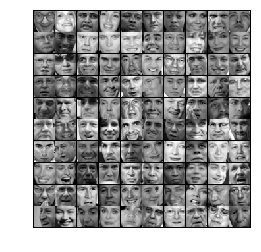

In [56]:
#displaying the data
def displayData(X,example_width):
    plt.close()
    plt.figure()
    plt.set_cmap('gray')#setting the color to gray
    
    m,n = X.shape
    
    #taking the height
    example_height = int(n/example_width)
    
    #no. of rows and columns
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols =int(math.ceil(m/display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    
    for i in range(1,display_rows+1):
        for j in range(1,display_cols+1):
            if curr_ex > m:
                break
            
            max_val = max(abs(X[curr_ex-1,:]))
            
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
            
            display_array[rows[0]:rows[-1]+1,cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :],(example_height, example_width),order = 'F') / max_val
            curr_ex += 1
        
        if curr_ex > m:
            break
    
    h = plt.imshow(display_array,vmin = -1,vmax = 1)
    
    plt.axis('off')
    plt.show(block = False)
    
    return h




displayData(Xface[0:100,:],int(Xface.shape[1]**0.5))



## 2.4.1 PCA on Faces


In [57]:
#To run PCA on the face dataset, we ﬁrst normalize the dataset by subtracting the mean of each feature from the data matrix X
#The script ex7 pca.m will do this for you and then run your PCA code. After running PCA, you will obtain the principal 
#components of the dataset. Notice that each principal component in U (each row) is a vector of length n (where for the face 
#dataset, n = 1024). It turns out that we can visualize these principal components by reshaping each of them into a 32×32 
#matrix that corresponds to the pixels in the original dataset. The script ex7 pca.m displays the ﬁrst 36 principal 
#components that describe the largest variations (Figure 8). If you want, you can also change the code to display more 
#principal components to see how they capture more and more details.


In [58]:
#%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#%  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#%  We display the first 36 eigenfaces.

In [59]:
#  Before running PCA, it is important to first normalize X by subtracting the mean value from each feature
[XfaceNorm, muFace, sigmaFace] = featureNormalize(Xface);

print(Xface.shape,XfaceNorm.shape)

(5000, 1024) (5000, 1024)


In [60]:
#Running PCA

Uface,Sface,Vface = pca(XfaceNorm)

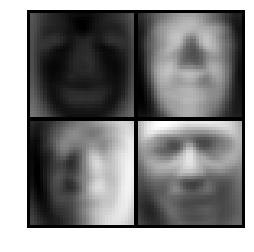

In [61]:
#  Visualize the top 36 eigenvectors found

displayData(Uface[:, 0:4].T,int(Uface.shape[0]**0.5));

In [62]:
print(Uface.shape)

(1024, 1024)


## 2.4.2 Dimensionality Reduction


In [63]:
#Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face
#dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the 
#original 1024 dimensions. This can help speed up your learning algorithm.


In [64]:
# The next part in ex7 pca.m will project the face dataset onto only the ﬁrst 100 principal components. Concretely, each  
# face image is now described by a vector z(i) ∈R100. 

In [65]:
#To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. In ex7 
#pca.m, an approximate recovery of the data is performed and the original and projected face images are displayed side by 
#side (Figure 9). From the reconstruction, you can observe that the general structure and appearance of the face are kept 
#while the ﬁne details are lost. This is a remarkable reduction (more than 10×) in
#the dataset size that can help speed up your learning algorithm signiﬁcantly. For example, if you were training a neural 
#network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension 
#reduced input of only a 100 dimensions instead of the original pixels.

In [66]:
# ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 

Kface = 100
Zface = projectData(XfaceNorm, Uface, Kface)

print(Zface.shape)

(5000, 100)


In [67]:
# recovering the data 
XfaceRecovered  = recoverData(Zface, Uface, Kface)

print(XfaceRecovered.shape)

(5000, 1024)


#### Visualizing both faces dataset

Original Faces


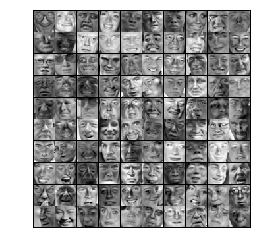




Recovered Faces


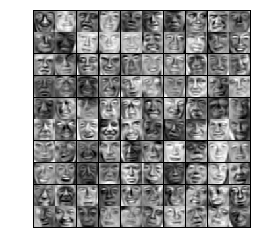

In [68]:
print('Original Faces')

displayData(XfaceNorm[0:100,:],int(XfaceNorm.shape[1]**0.5))

print('\n\n\nRecovered Faces')
displayData(XfaceRecovered[0:100,:],int(XfaceRecovered.shape[1]**0.5))


## 2.5 Optional (ungraded) exercise: PCA for visualization

In [69]:
#In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. In the 
#last part of the ex7 pca.m script, we have provided code to visualize the ﬁnal pixel assignments in this 3D space using the 
#scatter function. Each data point is colored according to the cluster it has been assigned to. You can drag your mouse on 
#the ﬁgure to rotate and inspect this data in 3 dimensions. It turns out that visualizing datasets in 3 dimensions or greater
#can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some 
#information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes. In the next 
#part of ex7 pca.m, the script will apply your implementation of PCA to the 3dimensional data to reduce it to 2 dimensions 
#and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that
#maximizes the spread of the data, which often corresponds to the “best” view.


(128, 128, 3)


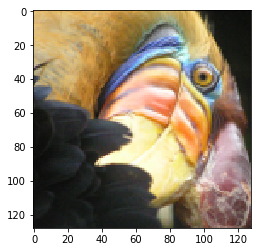

In [70]:
# Load 128x128 color image (bird small.png)
import imageio

#This creates a three-dimensional matrix A whose ﬁrst two indices identify a pixel position and whose last index represents 
#red, green, or blue.
img = imageio.imread(r'E:\Machine Learning\Exercises\machine-learning-ex7\ex7\bird_small.png')
print(img.shape)
#print(img)
plt.imshow(img)

In [71]:
#Divide by 255 so that all values are in the range 0 - 1
img = img / 255



In [72]:
# Reshape the image into an Nx3 matrix where N = number of pixels(128 x 128). Each row will contain the Red, Green and Blue pixel 
# values. This gives us our dataset matrix X that we will use K-Means and finds the top K = 16 colors to represent the image

#changing the image into (16384 x 3) dataset
Ximg = img.reshape(img.shape[0]*img.shape[1] , 3)

print(Ximg.shape)

(16384, 3)


In [73]:
#% Initialize the centroids to be random examples
def kMeansInitCentroids(X,K):
    # Randomly reorder the indices of examples 
    randidx = np.random.permutation(X.shape[0]) # m = X.shape[0]

    #% Take the first K examples as centroids 
    centroids = X[randidx[0:K]]
    
    return centroids

In [74]:
# This function takes the data matrix X and the locations of all centroids inside centroids and should output a 
# one-dimensional array idx that holds the index (a value in {1,...,K}, where K is total number of centroids) 
# of the closest centroid to every training example. 
def findClosestCentroids(X,initial_centroids):
    
    #it will have the length of m
    idx = np.zeros((X.shape[0],initial_centroids.shape[0]))
    
    
    #METHOD 1 ( for this size of idx will be (X.shape[0],1))
    
    # Isme loop m tk chlega
    """Isme me each i'th training data ko initial_centroids(having shape (3,2)) me se minus kr rha hu mere ps shape (3,2 aygi)
       fir uske bd square kr rha hu then sum row wise ab shape hogyi (3,1 ya 1,3) (this was magnitude**2) then ab me (3,1) ka
       minimum element ka index nikalunga and that will be my closest centroid index for that i'th data
    """
    #for i in range(X.shape[0]):
        
        #idx[i] = np.argmin(((X[i] - initial_centroids)**2).sum(axis = 1)) + 1
    
    #return idx
     
    
    #METHOD 2 ( for this size of idx will be (X.shape[0],initial_centroids.shape[0])) 
    
    #upr vale method me loop m tk gya so to reduce the loop we done this 
    """Isme mene kya trick lgai puri X ko mene hr ek initial_centroids ki hr ek row se minus kia then uska sum nikala row wise
        thik hai ek iteration me mere pas 300,1 ka aya fir esi kia upto k so after loop i have 300,3 ab row wise mene minimum
        element ka index nikala finally i have the required result"""
    
    for i in range(initial_centroids.shape[0]):
        idx[:,i] = ((X - initial_centroids[i])**2).sum(axis = 1)
    
    return idx.argmin(axis = 1) + 1

# Concretely, if two examples say x3 and x5 are assigned to centroid k = 2, then you should update µ2 = 1/2(x3 + x5) 
def computeCentroids(X, idx, K):
    
    mu_K = np.zeros((K,X.shape[1]))
    
    for i in range(K):
        
        # no. of elments assigned to the ith cluster
        C_k = len(np.where(idx==i+1)[0]) # i+1 is done here because cluster startingf from 1
        
        #finding mean of the ith cluster and assigning it to the ith centroid
        mu_K[i] = (X[np.where(idx == i+1)[0]]).sum(axis = 0)/C_k
     
    return mu_K

def runKMeans(X, initial_centroids, max_iters,plot_progress):
    
    #Initialize values
    
    m,n = X.shape # storing the training examples and no. of features
    
    K = initial_centroids.shape[0] # no. of rows of initial_centroids will be the value of K
    
    # it will store all the centroids therefore it will be a 3D array indicating ith index as
    # centroids obtained at ith iteration
    centroids = np.zeros((max_iters+1,K,n))
    
    # storing at 0th index our initial_centroids
    centroids[0] = initial_centroids
    
    idx = np.zeros((m,1))
    
    plt.figure(figsize=(9,7))
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids[i].reshape(K,n))
        
        centroids[i + 1] = computeCentroids(X,idx,K)

    if plot_progress:
        #coloring for the last iteration
        for i in range(K):
            plt.plot(X[np.where(idx == i + 1)][:,0],X[np.where(idx == i + 1)][:,1],'o',label = 'input data')

        plt.plot(centroids[:,:,0],centroids[:,:,1],'black',marker = '*',label = 'centroids')
        plt.plot(centroids[:,:,0],centroids[:,:,1],label = 'line')
    

    
    # returning the last centroid obtained and the idx specifying the cluster of each example
    return centroids[max_iters:,:].reshape(K,n) , idx

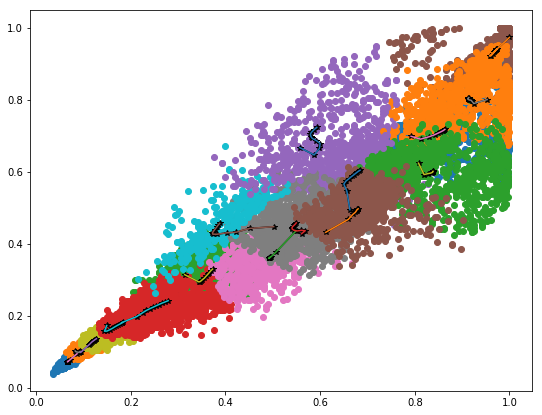

In [75]:
# Run your K-Means algorithm on this data
Kimg = 16
max_iters = 10

# When using K-Means, it is important to initialize the centroids randomly. 
initial_centroids = kMeansInitCentroids(Ximg, Kimg)

centroids, idx = runKMeans(Ximg, initial_centroids, max_iters,True)


In [76]:
Ximg.shape

(16384, 3)

### Plotting the 3D graph of bird image(i.e, having original dimension)

In [77]:
# We will plot the random 1000 examples into the 3D graph

import random

#creating random 1000 indexes
randomIndexes = random.sample(range(0, Ximg.shape[0]), 1000)

# taking corresponding input data
Xplot = Ximg[randomIndexes]

# taking corresponding centroids index
idxplot = idx[randomIndexes]

print(Xplot.shape)

(1000, 3)


<IPython.core.display.Javascript object>


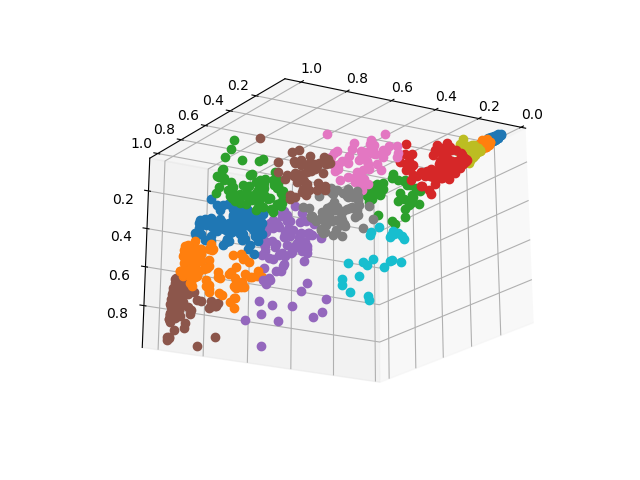

In [84]:
# Visualizing the centroids after obtaining the centroids
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(Kimg):
    
    temp = np.where(idxplot == i + 1)
    plt.plot(Xplot[temp][:,0],Xplot[temp][:,1],Xplot[temp][:,2],'o',label = 'input data')



In [85]:
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
[XnormImg, mu, sigma] = featureNormalize(Ximg)

# PCA and project the data to 2D
Uimg, Simg,Vimg = pca(XnormImg)
Zimg = projectData(XnormImg, Uimg, 2)

print(Zimg.shape)

(16384, 2)


<IPython.core.display.Javascript object>


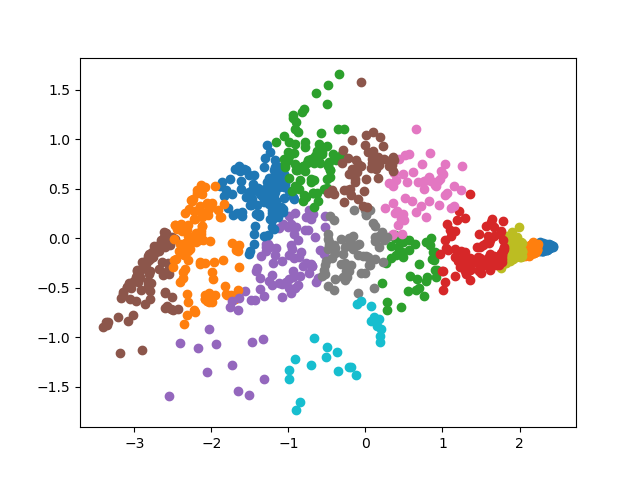

In [86]:
# finding the corresponding
Zplot = Zimg[randomIndexes]
fig1 = plt.figure()

for i in range(Kimg):
    
    temp = np.where(idxplot == i + 1)
    plt.plot(Zplot[temp][:,0],Zplot[temp][:,1],'o',label = 'input data')